
# Upper Confidence Bound (UCB)

---



## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [ ]:
import math
N = 10000 # number of rows/users/rounds
d = 10 # numbers of ads
ads_selected = [] # full list of ads selected over the rounds, will contain 10000 entries
number_of_selections = [0 for i in range (10)]
# number_of_selections = [0] * d
sums_of_rewards = [0 for i in range (10)] # accumulative reward for each of the ad
# sums_of_rewards = [0] * d
total_reward = 0 # total accumulative reward over the rounds
for n in range(N):
  ad = 0
  max_upper_bound = 0
  for i in range(d):
    # ad is not selected/clicked
    if number_of_selections[i] == 0:
      upper_bound = 1e400
    # ad has selected
    if number_of_selections[i] > 0:
      average_reward = sums_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt((3/2) * (math.log(n + 1) / number_of_selections[i]))
      upper_bound = average_reward + delta_i
    # take the highest upper bound ad
    if upper_bound > max_upper_bound:
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] += 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] += reward
  total_reward += reward

In [ ]:
print(ads_selected)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 9, 0, 8, 1, 2, 3, 4, 5, 6, 6, 7, 7, 7, 9, 7, 0, 6, 8, 1, 2, 3, 4, 4, 4, 4, 4, 5, 9, 7, 0, 0, 6, 8, 4, 0, 7, 1, 1, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 2, 3, 5, 9, 4, 1, 6, 8, 0, 7, 7, 7, 7, 7, 7, 4, 2, 3, 5, 9, 1, 6, 8, 0, 0, 7, 0, 4, 1, 6, 8, 2, 3, 5, 9, 7, 0, 4, 4, 4, 7, 7, 7, 7, 1, 6, 8, 2, 3, 5, 9, 0, 7, 7, 4, 7, 7, 7, 1, 6, 8, 0, 4, 4, 2, 3, 5, 9, 4, 7, 0, 7, 1, 1, 1, 6, 6, 6, 6, 6, 8, 4, 2, 3, 5, 9, 7, 7, 7, 0, 6, 4, 1, 1, 1, 8, 7, 2, 3, 5, 9, 4, 0, 1, 1, 1, 6, 7, 8, 4, 1, 2, 3, 5, 9, 0, 6, 7, 8, 4, 7, 1, 0, 6, 2, 3, 5, 9, 7, 7, 7, 7, 4, 4, 4, 4, 4, 7, 8, 1, 0, 6, 6, 6, 7, 4, 2, 3, 5, 9, 1, 6, 8, 7, 0, 4, 4, 4, 4, 4, 2, 3, 5, 9, 1, 6, 7, 4, 8, 0, 7, 4, 4, 4, 1, 6, 2, 3, 5, 9, 0, 0, 0, 7, 8, 4, 0, 0, 0, 1, 6, 7, 4, 2, 3, 5, 9, 0, 8, 7, 1, 6, 4, 0, 7, 7, 7, 7, 7, 2, 3, 5, 9, 8, 4, 1, 6, 6, 6, 7, 7, 7, 0, 6, 7, 4, 1, 1, 1, 2, 2, 2, 3, 5, 9, 2, 8, 7, 0, 1, 6, 4, 7, 2, 8, 3, 5, 9, 9, 9, 9, 4, 0, 1, 

In [ ]:
print(number_of_selections)

[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]


In [ ]:
print(sums_of_rewards)

[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]


In [ ]:
print(total_reward)

2178


## Visualising the results

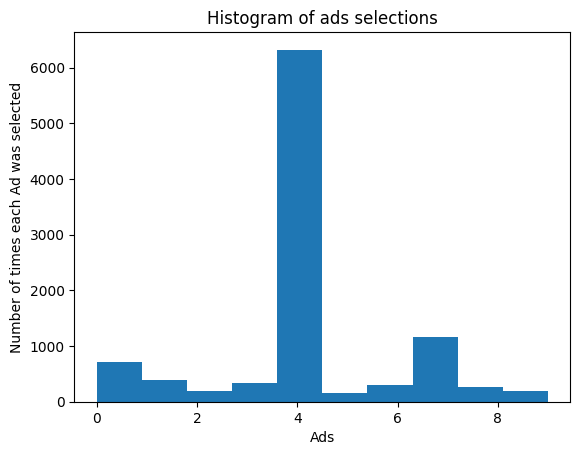

In [ ]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each Ad was selected')
plt.show()